In [6]:
import h5py
import hdf5plugin
import math

f = h5py.File("HIV.h5",'r')   
print(f'Number of keys:', len(f.keys()))
my_spectra = []

count = -1
keys = list(f.keys())
print(keys)

for key in keys[:50000]:
    count+=1
    my_spectra.append([(count % 335, count // 335), f.get(key)["x"][:],f.get(key)["y"][:]])
  

print("Done adding to array!")    

Number of keys: 56679
['1', '10', '100', '1000', '10000', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10008', '10009', '1001', '10010', '10011', '10012', '10013', '10014', '10015', '10016', '10017', '10018', '10019', '1002', '10020', '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028', '10029', '1003', '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038', '10039', '1004', '10040', '10041', '10042', '10043', '10044', '10045', '10046', '10047', '10048', '10049', '1005', '10050', '10051', '10052', '10053', '10054', '10055', '10056', '10057', '10058', '10059', '1006', '10060', '10061', '10062', '10063', '10064', '10065', '10066', '10067', '10068', '10069', '1007', '10070', '10071', '10072', '10073', '10074', '10075', '10076', '10077', '10078', '10079', '1008', '10080', '10081', '10082', '10083', '10084', '10085', '10086', '10087', '10088', '10089', '1009', '10090', '10091', '10092', '10093', '10094', '10095', '10096', '10097

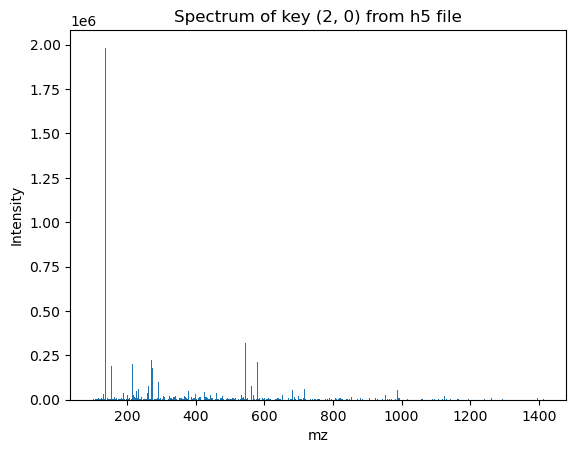

[100.07500828 100.07524566 100.07548304 100.07572042 100.07595779]
[ 1471.37231445  4406.52587891  7685.81152344 10297.22363281
  8413.64355469]


In [3]:
import matplotlib.pyplot as plt
spectrumx = my_spectra[2]
plt.bar(spectrumx[1],spectrumx[2])
title = "Spectrum of key " + str(spectrumx[0]) + " from h5 file"
plt.title(title)
plt.xlabel("mz")
plt.ylabel("Intensity")
plt.show()

print(spectrumx[1][5:10])
print(spectrumx[2][5:10])



335 90
Points found 29779


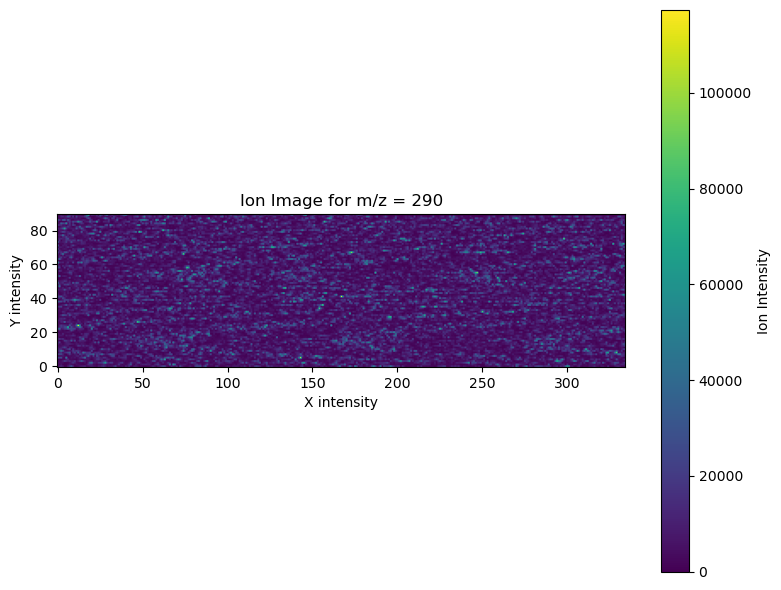

In [5]:
import numpy as np
target_mz = 290
tolerance = 0.1

# Get image dimensions
# all_coords = [(index % 335, index // 335) for index, _, _ in my_spectra]
all_coords = [coord for coord, _,_ in my_spectra]
# print(all_coords)
xs, ys= zip(*all_coords)
width = max(xs) + 1
height = max(ys) + 1
print(width,height)



# Create empty image
ion_image = np.zeros((height, width))

# Fill in the ion image with intensities for target m/z
times = 0 
for (x,y), mzs, intensities in my_spectra:
   
    mz_mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
    if np.any(mz_mask):
        times+=1
        ion_intensity = np.mean(intensities[mz_mask])
        ion_image[y, x] = ion_intensity
print(f"Points found", times)

# Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()

In [ ]:
ion_image[0,0]
